In [10]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt

from sklearn.model_selection import train_test_split
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score
from sklearn.preprocessing import LabelEncoder, StandardScaler
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.metrics import mean_squared_error, r2_score, mean_absolute_error
from sklearn.ensemble import RandomForestClassifier



In [30]:
df = pd.read_csv("data/german_credit_data.csv").copy()

# Check how many missing values per column
print("Missing values per column:")
print(df.isna().sum())

Missing values per column:
Unnamed: 0            0
Age                   0
Sex                   0
Job                   0
Housing               0
Saving accounts     183
Checking account    394
Credit amount         0
Duration              0
Purpose               0
dtype: int64


In [13]:
# Hnadle missing vlues 
df['Saving accounts'] = df['Saving accounts'].fillna('unknown')
df['Checking account'] = df['Checking account'].fillna('unknown')

In [15]:
# Encode categorical variables with LabelEncoder
cat_cols = ['Sex', 'Housing', 'Saving accounts', 'Checking account', 'Purpose']

label_encoders = {}
for column in cat_cols:
    le = LabelEncoder()
    df[column] = le.fit_transform(df[column])
    label_encoders[column] = le

In [16]:
# Replace any inf with NaN (just in case) so the imputer can handle them
df = df.replace([np.inf, -np.inf], np.nan)

In [17]:
display(df.head())
print(df.info())

,Unnamed: 0,Age,Sex,Job,Housing,Saving accounts,Checking account,Credit amount,Duration,Purpose
0,0,67,1,2,1,4,0,1169,6,5
1,1,22,0,2,1,0,1,5951,48,5
2,2,49,1,1,1,0,3,2096,12,3
3,3,45,1,2,0,0,0,7882,42,4
4,4,53,1,2,0,0,0,4870,24,1


<class 'pandas.core.frame.DataFrame'>
RangeIndex: 1000 entries, 0 to 999
Data columns (total 10 columns):
 #   Column            Non-Null Count  Dtype
---  ------            --------------  -----
 0   Unnamed: 0        1000 non-null   int64
 1   Age               1000 non-null   int64
 2   Sex               1000 non-null   int64
 3   Job               1000 non-null   int64
 4   Housing           1000 non-null   int64
 5   Saving accounts   1000 non-null   int64
 6   Checking account  1000 non-null   int64
 7   Credit amount     1000 non-null   int64
 8   Duration          1000 non-null   int64
 9   Purpose           1000 non-null   int64
dtypes: int64(10)
memory usage: 78.3 KB
None


/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


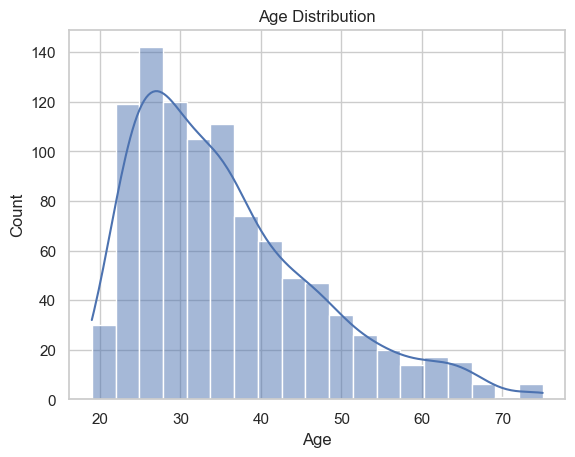

/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: divide by zero encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: overflow encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)
/Library/Frameworks/Python.framework/Versions/3.13/lib/python3.13/site-packages/scipy/_lib/_util.py:1279: RuntimeWarning: invalid value encountered in vecdot
  return np.vecdot(x1, x2, axis=axis)


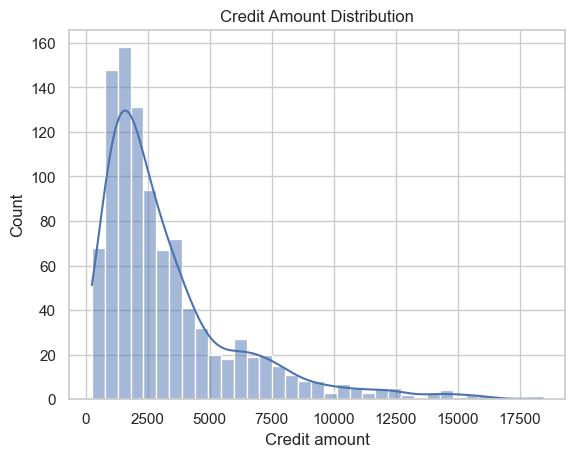

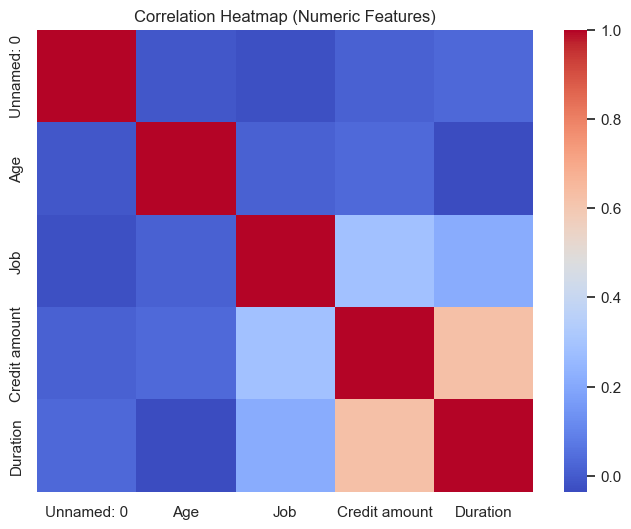

In [31]:
# EDA 

# Age distribution
sns.histplot(df['Age'], kde=True)
plt.title('Age Distribution')
plt.show()

# Credit amount distribution
sns.histplot(df['Credit amount'], kde=True)
plt.title('Credit Amount Distribution')
plt.show()

# Correlation heatmap for numeric columns
plt.figure(figsize=(8,6))
corr = df.corr(numeric_only=True)
sns.heatmap(corr, annot=False, cmap="coolwarm")
plt.title("Correlation Heatmap (Numeric Features)")
plt.show()

In [32]:
# We turn credit amount into a binary label:
# 1 = high credit amount (above median)
# and 0 = low (below or equal to median)
target_col = "Credit amount"
threshold = df[target_col].median()

df['HighCredit'] = (df[target_col] > threshold).astype(int)

print("Median credit amount:", threshold)
print(df['HighCredit'].value_counts())

# Features and target
y = df['HighCredit']
X = df.drop(columns=[target_col, 'HighCredit'])  # drop original amount and label

print("Features shape:", X.shape)
print("Target shape:", y.shape)


Median credit amount: 2319.5
HighCredit
0    500
1    500
Name: count, dtype: int64
Features shape: (1000, 9)
Target shape: (1000,)


In [25]:
X_train, X_test, y_train, y_test = train_test_split(
    X, y,
    test_size=0.3,
    random_state=42
)

print("Train size:", X_train.shape, y_train.shape)
print("Test size:", X_test.shape, y_test.shape)

Train size: (700, 9) (700,)
Test size: (300, 9) (300,)


In [26]:
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

In [21]:
numeric_preprocess = Pipeline(steps=[
    ("imputer", SimpleImputer(strategy="mean")),
    ("scaler", StandardScaler())
])

In [28]:
# Train a Random Forest Classifier
model = RandomForestClassifier(n_estimators=100, random_state=42)
model.fit(X_train, y_train)

# Predict on the test set
y_pred = model.predict(X_test)


In [29]:
accuracy = accuracy_score(y_test, y_pred)
conf_matrix = confusion_matrix(y_test, y_pred)
class_report = classification_report(y_test, y_pred)

print(f"Accuracy: {accuracy:.2f}")
print("Confusion Matrix:")
print(conf_matrix)
print("Classification Report:")
print(class_report)

Accuracy: 0.74
Confusion Matrix:
[[124  31]
 [ 46  99]]
Classification Report:
              precision    recall  f1-score   support

       False       0.73      0.80      0.76       155
        True       0.76      0.68      0.72       145

    accuracy                           0.74       300
   macro avg       0.75      0.74      0.74       300
weighted avg       0.74      0.74      0.74       300



,feature,importance
7,Duration,0.346127
0,Unnamed: 0,0.195498
1,Age,0.153081
8,Purpose,0.077058
3,Job,0.061018
6,Checking account,0.053743
5,Saving accounts,0.049673
4,Housing,0.035269
2,Sex,0.028532


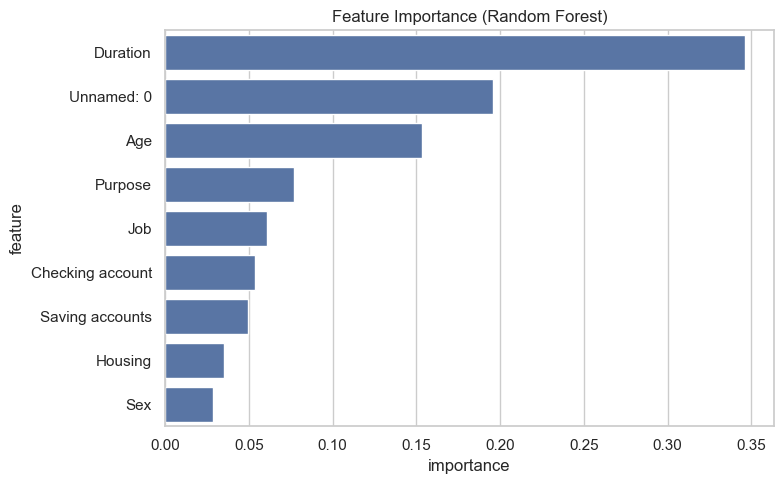

In [33]:
# Feature importance plot from Random Forest
importances = model.feature_importances_
feature_names = X.columns

feat_imp = pd.DataFrame({
    "feature": feature_names,
    "importance": importances
}).sort_values(by="importance", ascending=False)

display(feat_imp)

plt.figure(figsize=(8,5))
sns.barplot(x="importance", y="feature", data=feat_imp)
plt.title("Feature Importance (Random Forest)")
plt.tight_layout()
plt.show()
